In [1]:
import os
import matplotlib.pyplot as plt
from tools import loader, mri2, simulation
from nerf.runner import Runner

# make measured data from image
path_data = '../NeRF_MR/data/brain/file_brain_AXFLAIR_200_6002462.h5'
z_slice = 1
af = 8
mode = 'golden'
is_incribed = True

mri = loader.loadNYU(path_data)[z_slice]
image_shape = mri.shape
num_angles = mri2.getMinimalSpokes(image_shape)
angles = mri2.getAngles(int(num_angles/af), mode)
data = simulation.makeMeasuredData(mri, angles, is_incribed)
name_data = os.path.splitext(os.path.split(path_data)[-1])[0]

# set runner
image_info = [image_shape, is_incribed, name_data, z_slice]
name_config = 'config_brain'
device = 0
runner = Runner(image_info, name_config, device)

# training
data_info = [angles, af, mode]
runner.train(data, data_info, notebook=True)

training
name     : file_brain_AXFLAIR_200_6002462
slice    : 01
AF       : 08
# angles : 062
mode     : golden


  0%|          | 0/10 [00:00<?, ?it/s]

Output()

KeyboardInterrupt: 

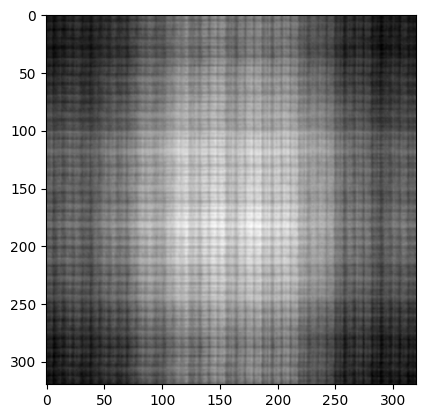

In [ ]:
# inference
exam_No = -1
ckpt_No = -1
recon = runner.infer(data_info, [exam_No, ckpt_No])
plt.imshow(recon[0])

  0%|          | 0/2 [00:00<?, ?it/s]

Output(msg_id='db6392f8-b793-4d52-9455-876842e72e6d')

Output(msg_id='db6392f8-b793-4d52-9455-876842e72e6d')